<a href="https://colab.research.google.com/github/DanielleMichelleCodes/Movie-Revenue-Predictions/blob/main/Danielle_Jones_Project_2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('/content/drive/MyDrive/Datafiles/imdb(MOVIES).csv')
df.head()

,ranking of movie,movie name,Year,certificate,runtime,genre,RATING,DETAIL ABOUT MOVIE,DIRECTOR,ACTOR 1,ACTOR 2,ACTOR 3,ACTOR 4,votes,metascore,GROSS COLLECTION
0,1,Jai Bhim,-2021,TV-MA,164 min,"Crime, Drama",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,NaN,NaN
1,2,The Shawshank Redemption,-1994,R,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,$28.34M
2,3,The Godfather,-1972,R,175 min,"Crime, Drama",9.2,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,$134.97M
3,4,The Dark Knight,-2008,PG-13,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.0,$534.86M
4,5,The Godfather: Part II,-1974,R,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1202401,90.0,$57.30M


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ranking of movie    250 non-null    int64  
 1   movie name          250 non-null    object 
 2   Year                250 non-null    object 
 3   certificate         250 non-null    object 
 4   runtime             250 non-null    object 
 5   genre               250 non-null    object 
 6   RATING              250 non-null    float64
 7   DETAIL ABOUT MOVIE  250 non-null    object 
 8   DIRECTOR            250 non-null    object 
 9   ACTOR 1             250 non-null    object 
 10  ACTOR 2             250 non-null    object 
 11  ACTOR 3             250 non-null    object 
 12  ACTOR 4             250 non-null    object 
 13  votes               250 non-null    int64  
 14  metascore           218 non-null    float64
 15  GROSS COLLECTION    214 non-null    object 
dtypes: float

In [63]:
#Checking for duplicates
df.duplicated().sum()

0

### Remove Unnecessary Columns

The `Detail About Movie' is a summary about the movie content and isn't useful in this data set 

In [64]:
df = df.drop(columns=['DETAIL ABOUT MOVIE', 'ACTOR 1', 'ACTOR 2', 'ACTOR 3', 'ACTOR 4'])
df.head()

,ranking of movie,movie name,Year,certificate,runtime,genre,RATING,DIRECTOR,votes,metascore,GROSS COLLECTION
0,1,Jai Bhim,-2021,TV-MA,164 min,"Crime, Drama",9.4,T.J. Gnanavel,163431,NaN,NaN
1,2,The Shawshank Redemption,-1994,R,142 min,Drama,9.3,Frank Darabont,2515762,80.0,$28.34M
2,3,The Godfather,-1972,R,175 min,"Crime, Drama",9.2,Francis Ford Coppola,1732749,100.0,$134.97M
3,4,The Dark Knight,-2008,PG-13,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,2466041,84.0,$534.86M
4,5,The Godfather: Part II,-1974,R,202 min,"Crime, Drama",9.0,Francis Ford Coppola,1202401,90.0,$57.30M


###Addressing missing values

In [65]:
df.isna().sum()

ranking of movie     0
movie name           0
Year                 0
certificate          0
runtime              0
genre                0
RATING               0
DIRECTOR             0
votes                0
metascore           32
GROSS COLLECTION    36
dtype: int64

In [66]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['movie name ', 'Year', 'certificate', 'runtime', 'genre', 'DIRECTOR ',
       'GROSS COLLECTION'],
      dtype='object')

In [67]:
from pandas.core.resample import f
for col in str_cols:
  print(f"-Column= {col}")
  print(df[col].value_counts(dropna=False))
  print('\n\n')

-Column= movie name 
Jai Bhim                                 1
The Gold Rush                            1
The Great Escape                         1
To Kill a Mockingbird                    1
Yojimbo                                  1
                                        ..
Eternal Sunshine of the Spotless Mind    1
Amélie                                   1
Requiem for a Dream                      1
American Beauty                          1
The General                              1
Name: movie name , Length: 250, dtype: int64



-Column= Year
-1995    8
-2019    7
-1957    7
-2004    6
-2000    6
        ..
-1921    1
-1927    1
-1941    1
-1944    1
-1926    1
Name: Year, Length: 90, dtype: int64



-Column= certificate
R            106
PG            36
PG-13         31
Not Rated     30
G             15
Passed        15
Approved      12
TV-MA          2
TV-14          1
M              1
GP             1
Name: certificate, dtype: int64



-Column= runtime
130 min    9
132 min   

In [68]:
df.describe()

,ranking of movie,RATING,votes,metascore
count,250.000000,250.000000,2.500000e+02,218.000000
mean,125.500000,8.308400,5.785299e+05,82.449541
std,72.312977,0.234669,4.951304e+05,10.822392
min,1.000000,8.100000,2.653800e+04,55.000000
25%,63.250000,8.100000,1.688628e+05,75.000000
50%,125.500000,8.200000,4.313355e+05,84.000000
75%,187.750000,8.400000,8.854255e+05,90.000000
max,250.000000,9.400000,2.515762e+06,100.000000


Data looks good to move on

#Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


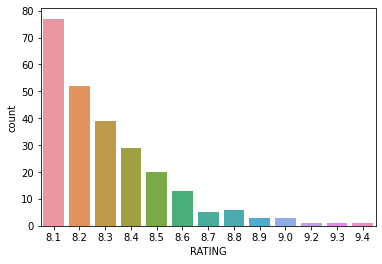

In [69]:
#Univariate
sns.countplot(df['RATING'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


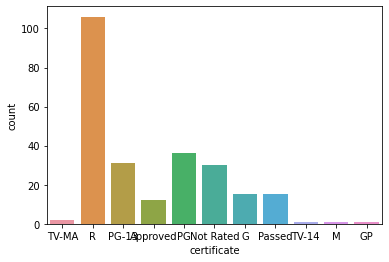

In [70]:
sns.countplot(df['certificate'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ranking of movie  250 non-null    int64  
 1   movie name        250 non-null    object 
 2   Year              250 non-null    object 
 3   certificate       250 non-null    object 
 4   runtime           250 non-null    object 
 5   genre             250 non-null    object 
 6   RATING            250 non-null    float64
 7   DIRECTOR          250 non-null    object 
 8   votes             250 non-null    int64  
 9   metascore         218 non-null    float64
 10  GROSS COLLECTION  214 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 21.6+ KB


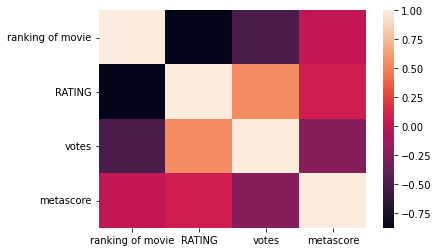

In [72]:
#Heatmap
sns.heatmap(data=df.corr())